### Configuração Inicial

In [1]:
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
funcao_afim = lambda x: (0.5 * x) + 1

In [3]:
valores_x = [-2, -1, 0 , 1 , 2]

valores_y = list(map(funcao_afim, valores_x));

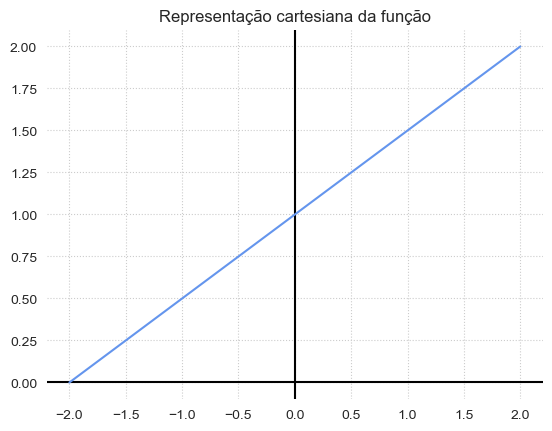

In [4]:
fig, ax = plt.subplots()

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

plt.grid(linestyle='dotted')
ax.spines[["top","bottom","left","right"]].set_visible(False)

plot = sns.lineplot(
    x=valores_x, y=valores_y, color="cornflowerblue",ax=ax).set(
    title="Representação cartesiana da função")

In [5]:
def correlacao_pearson(x, y):
    if len(x)==len(y) and (isinstance(x, np.ndarray) and isinstance(y, np.ndarray)):
        somatoria_medias = sum((x - x.mean()) * (y - y.mean()))
        somatoria_x_quadrado = sum((x - x.mean()) ** 2)
        somatoria_y_quadrado = sum((y - y.mean()) ** 2)       
        valor_final = somatoria_medias / np.sqrt(somatoria_x_quadrado * somatoria_y_quadrado)
        return valor_final

# correlacao_pearson(np.array(valores_x),np.array(valores_y))

# np.correlate(np.array(valores_x),np.array(valores_y))

# statistics.correlation(valores_x, valores_y)

# df.corr(method="pearson")

## Modelagem da Regressão Simples

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

model_scikit = LinearRegression()
admission = pd.read_csv("Admission_Predict.csv")

# Conversão de decimal para porcentagem
admission["Chance of Admit "] = admission["Chance of Admit "] * 100

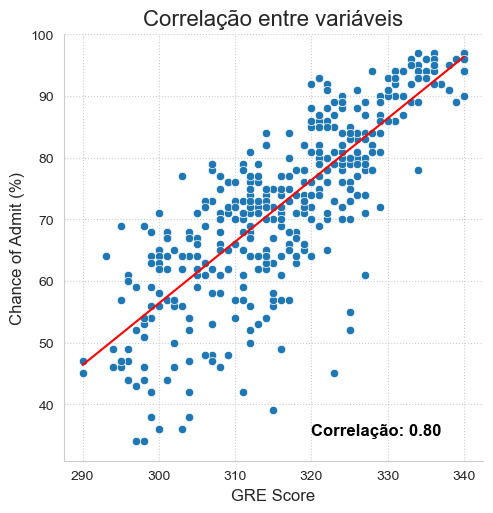

In [41]:
GRE_correlation = statistics.correlation(
    admission["GRE Score"], admission["Chance of Admit "]
)

sns.relplot(
    x=admission["GRE Score"], y=admission["Chance of Admit "]
)

plt.title('Correlação entre variáveis', fontsize=16)
plt.xlabel('GRE Score', fontsize=12)
plt.ylabel('Chance of Admit (%)', fontsize=12)

plt.text(
    x = 320, y = 35, 
    s = f"Correlação: {GRE_correlation:.2f}", 
    horizontalalignment='left', size='large', color='black', weight='bold')

plt.grid(linestyle='dotted')

In [8]:
std_dev_x = admission.std(axis=0)["GRE Score"]
std_dev_y = admission.std(axis=0)["Chance of Admit "]
reg_coef_angular = GRE_correlation * (std_dev_y / std_dev_x)

media_x = admission["GRE Score"].mean()
media_y = admission["Chance of Admit "].mean()
reg_intercepto = media_y - (reg_coef_angular * media_x)
print(f"Intercepto: {reg_intercepto:.2f} \n"
      f"Coeficiente angular: {reg_coef_angular:.2f}")

Intercepto: -243.61 
Coeficiente angular: 1.00


In [9]:
def predicao(pontuacao_GRE):
    return reg_intercepto + (pontuacao_GRE * reg_coef_angular)

predicao(280)  # Retorna 35.71

35.71627223397326

In [10]:
#  Divisão entre colunas regressores / alvo
X = admission.drop(columns="Chance of Admit ")
Y = admission["Chance of Admit "]

#  Divisão treino / teste
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, shuffle=42)

#  Reshape para compatibilidade em regressão simples
x_train_simple = x_train["GRE Score"].to_numpy().reshape((-1, 1))
x_test_simple = x_test["GRE Score"].to_numpy().reshape((-1, 1))

#  Treino e predição do modelo de regressão
model_scikit_simple = model_scikit.fit(x_train_simple, y_train)

pred = model_scikit_simple.predict(np.array(280).reshape((-1, 1)))
coeficiente_determinacao = model_scikit.score(x_test_simple, y_test)

print(f"Valor previsto: {pred[0]:.2f} \n"
      f"Precisão de predição: {coeficiente_determinacao:.2f}")

Valor previsto: 35.51 
Precisão de predição: 0.63


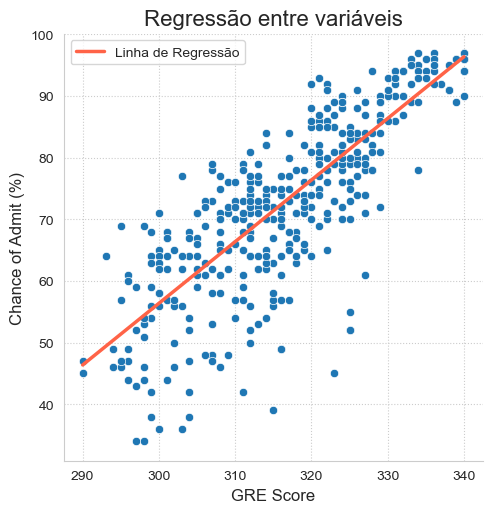

In [66]:
sns.relplot(
    x=admission["GRE Score"], y=admission["Chance of Admit "]
)

plt.title("Regressão entre variáveis", fontsize=16)
plt.xlabel("GRE Score", fontsize=12)
plt.ylabel("Chance of Admit (%)", fontsize=12)
plt.grid(linestyle="dotted")

# Conjunto de valores para traçar a linha de regressão.

x_linha = np.linspace(290, 340, 25)  # Escolhendo 25 pontos ao acaso.

# Cálculo conforme a equação obtida.
y_linha = -243.61 + 1 * x_linha

plt.plot(
    x_linha, y_linha, 
    color="tomato", label="Linha de Regressão", linewidth=2.5
)

plt.legend();

## Regressão Multipla

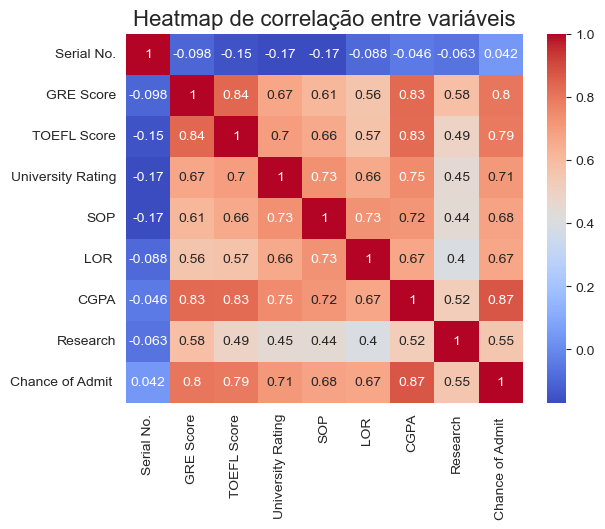

In [12]:
sns.heatmap(admission.corr(), annot=True, cmap="coolwarm")

plt.title("Heatmap de correlação entre variáveis", fontsize=16);

In [14]:
#  Vamos também reformatar o dataframe para contar apenas colunas desejadas.
admission = admission[[
    "GRE Score", "TOEFL Score", "CGPA", "Chance of Admit "
]]

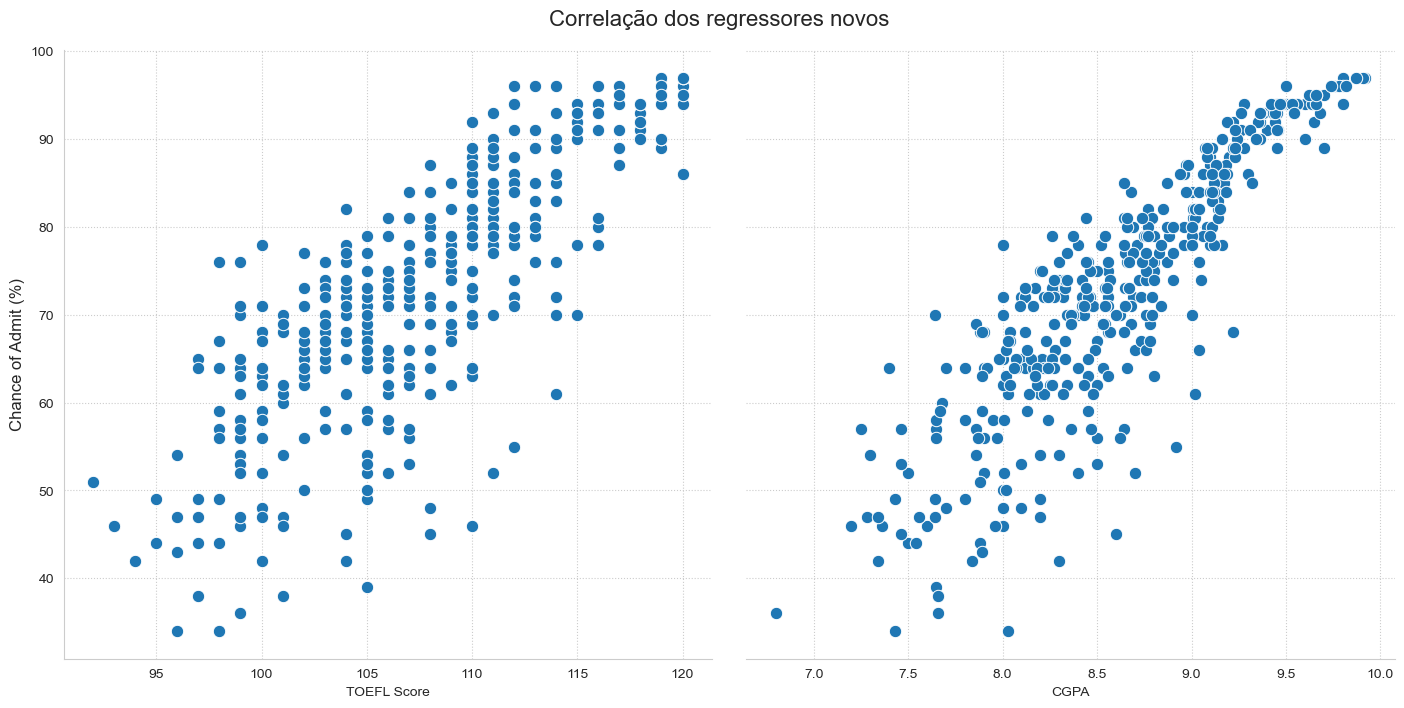

In [110]:
fig, axs = plt.subplots(figsize=(14,7), ncols=2, sharey="row")
plt.suptitle("Correlação dos regressores novos", fontsize=16)
plt.tight_layout()

#  Primeiro gráfico
axs[0].set_ylabel("Chance of Admit (%)", fontsize=12)
axs[0].grid(linestyle="dotted")
sns.despine(ax=axs[0])

sns.scatterplot(
    x=admission["TOEFL Score"], y=admission["Chance of Admit "], ax=axs[0], s=80
)

# Segundo gráfico

axs[1].grid(linestyle="dotted")
sns.despine(ax=axs[1], left=True)

sns.scatterplot(
    x=admission["CGPA"], y=admission["Chance of Admit "], ax=axs[1], s=80
);

In [11]:


model_sm = sm.OLS(y_train, sm.add_constant(x_train_simple))
resultado = model_sm.fit()
print(resultado.params)
print(resultado.summary())

const   -245.836182
x1         1.004806
dtype: float64
                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     579.7
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           1.20e-73
Time:                        07:42:07   Log-Likelihood:                -1140.4
No. Observations:                 320   AIC:                             2285.
Df Residuals:                     318   BIC:                             2292.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [13]:


#  Divisão entre colunas regressores / alvo
X = admission.drop(columns="Chance of Admit ")
Y = admission["Chance of Admit "]

#  Divisão treino / teste
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, shuffle=42)


#  Treino e predição do modelo de regressão
model_scikit_multiple = model_scikit.fit(x_train, y_train)

pred = model_scikit_multiple.predict(x_test)
coeficiente_determinacao = model_scikit.score(x_test, y_test)
pred

array([71.00098039, 91.23119483, 75.96378554, 72.46315801, 96.43399797,
       74.56199867, 60.82469995, 51.69887847, 94.98721547, 76.55300611,
       89.97452098, 90.37118604, 65.05860841, 57.55968616, 60.36414462,
       78.05212481, 57.73701731, 87.69923388, 61.85660299, 53.35099396,
       77.29678843, 62.99827381, 88.13651033, 76.89101617, 74.79900662,
       66.91762185, 60.5959173 , 92.31019882, 75.9221215 , 57.42752139,
       73.26454266, 69.20619875, 70.76397245, 81.39170102, 64.69205333,
       67.42262962, 69.28602731, 70.05431194, 65.20372143, 74.98194261,
       71.15554215, 71.05454003, 90.57546637, 83.35015162, 92.34153223,
       84.84138655, 73.7856595 , 70.36730738, 52.24609346, 61.89337331,
       60.7238686 , 50.59642484, 57.96947025, 93.09686861, 77.12890601,
       41.86971529, 68.80552185, 62.49676556, 67.51068348, 52.01799107,
       85.89133321, 74.00288809, 48.32674541, 69.41873525, 46.01067616,
       82.60531663, 81.03302971, 77.16200603, 48.58407306, 72.08